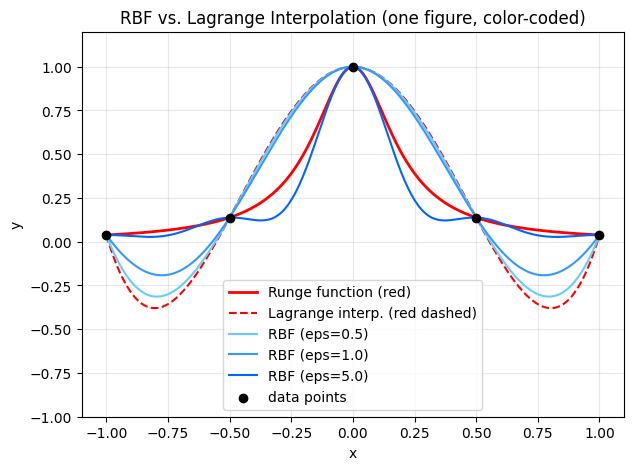

In [11]:
import numpy as np
import matplotlib.pyplot as plt

###############################################################################
# 1. 보간할 실제 함수 (Runge)
def f(x):
    return 1.0 / (1.0 + 25.0 * x**2)

###############################################################################
# 2. 라그랑주 다항식 보간 함수
def lagrange_interpolation(xData, yData, xEval):
    m = len(xData)
    pVals = np.zeros_like(xEval, dtype=float)
    for i in range(m):
        Li = np.ones_like(xEval)
        for j in range(m):
            if i != j:
                Li *= (xEval - xData[j]) / (xData[i] - xData[j])
        pVals += yData[i] * Li
    return pVals

###############################################################################
# 3. RBF(Gaussian) 보간 함수
def rbf_gaussian_interpolation(xData, yData, xEval, eps):
    m = len(xData)
    # (m x m) RBF 행렬 구성
    A = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            r = xData[i] - xData[j]
            A[i, j] = np.exp(- (eps*r)**2)
    # 보간계수 alpha = A^{-1} * yData
    alpha = np.linalg.solve(A, yData)
    # xEval에서의 보간값
    pVals = np.zeros_like(xEval)
    for i in range(m):
        r = xEval - xData[i]
        pVals += alpha[i] * np.exp(- (eps*r)**2)
    return pVals

###############################################################################
# 4. 메인
if __name__ == "__main__":
    # (a) 보간 노드 & 데이터
    xData = np.linspace(-1.0, 1.0, 5)
    yData = f(xData)

    # (b) 시각화용 x좌표
    xPlot = np.linspace(-1.0, 1.0, 300)

    # (c) 라그랑주 보간 미리 계산
    yLagr = lagrange_interpolation(xData, yData, xPlot)

    # (d) 다양한 shape parameter
    shapeParams = [0.5, 1.0, 5.0]

    # 파랑 계열 색상(밝은->어두운 순) 예시
    blue_colors = ["#66CCFF", "#3399FF", "#0066FF", "#003399", "#000066"]

    # (e) 그래프 시작
    plt.figure(figsize=(7,5))

    # 원래 Runge 함수 (빨간 실선, 조금 굵게)
    plt.plot(xPlot, f(xPlot), color="red", linewidth=2.0,
             label="Runge function (red)")

    # 라그랑주 (빨간 점선)
    plt.plot(xPlot, yLagr, color="red", linestyle="--",
             label="Lagrange interp. (red dashed)")

    # (f) RBF 보간 그래프 (서로 다른 파랑 계열)
    for i, eps in enumerate(shapeParams):
        yRbf = rbf_gaussian_interpolation(xData, yData, xPlot, eps)
        plt.plot(xPlot, yRbf, color=blue_colors[i],
                 label=f"RBF (eps={eps})")

    # 데이터 노드 (마커)
    plt.scatter(xData, yData, color="black", marker="o", zorder=5,
                label="data points")

    plt.title("RBF vs. Lagrange Interpolation (one figure, color-coded)")
    plt.legend(loc="best")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.ylim([-1.0, 1.2])  # 보기 좋게 y 범위 설정 (옵션)
    plt.grid(True, alpha=0.3)

    plt.show()
